In [3]:
import pickle
import json

import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import matplotlib.pyplot as plt


In [4]:
data = None

with open('full_factorial/all_experiments_full_factorial.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
configs = None

with open('full_factorial/experiment_data_with_id_full_factorial.json') as f:
    configs = json.load(f)

In [6]:
configs_df = pd.read_csv('full_factorial/full_factorial_configs_as_df.csv')


## Actual analysis

### Power calculation

In [7]:
# TDP/core

# Skylake, Broadwell, Haswell, AMD EPYC Rome, and AMD EPYC Milan
# 6700: 65/4, 5775c: 65/8, 4770:  84/4, EPYC 7352: 155/24, EPYC 7443: 200/24

tdp_per_core = sum([65/4, 65/8, 84/4, 155/24, 200/24]) / 5

tdp_per_core

12.033333333333335

### Plot loaded data

In [8]:
columns_to_plot = list(data[list(data.keys())[0]].columns)

### Setup

In [9]:
def prepare_data(X, y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = preprocessing.StandardScaler().fit(X, y)

    # ... and scale the features
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [10]:
from re import X


CNN = "Cifar10CNN" # Cifar10ResNet
ResNet = "Cifar10ResNet"

network_data_CNN = configs_df[configs_df['model'] == CNN]
network_data_ResNet = configs_df[configs_df['model'] == ResNet]
network_data_combined = configs_df



In [53]:
# UPDATE HERE THE COLUMNS YOU WANT TO USE FOR THE FITTING
X_CNN = network_data_CNN[[
    # 'model',
#  'batch_size',
#  'test_batch_size',
 'Paralell',
#  'Memory',
 'CPU',
 ]]

X_ResNet = network_data_ResNet[[
    # 'model',
#  'batch_size',
#  'test_batch_size',
 'Paralell',
#  'Memory',
 'CPU',
 ]]

X_combined = network_data_combined[[
    'model',
#  'batch_size',
#  'test_batch_size',
 'Paralell',
#  'Memory',
 'CPU',
 ]]

maskCNN = X_combined.model == 'Cifar10CNN'
maskResNet = X_combined.model == 'Cifar10ResNet'
X_combined.loc[maskCNN, 'model'] = 1
X_combined.loc[maskResNet, 'model'] = 2

# UPDATE HERE THE COLUMN THAT YOU WANT TO PREDICT
y_CNN = network_data_CNN['mean train latency per epoch'] + network_data_CNN['mean test latency per epoch']  #Sum of latencies is service time
y_ResNet = network_data_ResNet['mean train latency per epoch'] + network_data_ResNet['mean test latency per epoch']  #Sum of latencies is service time
y_combined = network_data_combined['mean train latency per epoch'] + network_data_combined['mean test latency per epoch']  #Sum of latencies is service time

# y_CNN = network_data_CNN['mean cpu usage per epoch']
# y_ResNet = network_data_ResNet['mean cpu usage per epoch'] 
# y_combined = network_data_combined['mean cpu usage per epoch']

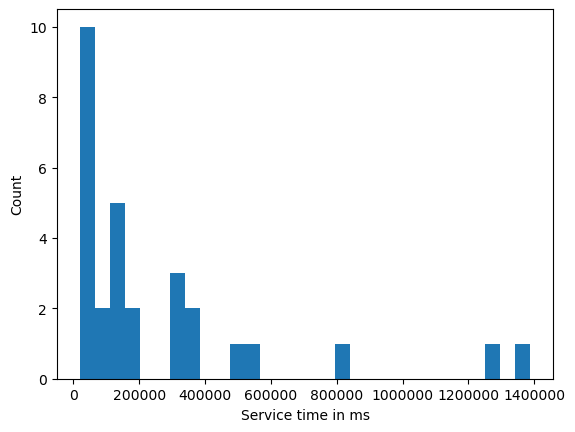

In [54]:
fig, ax = plt.subplots()
bins = 10*(np.arange(0,10))
ax.hist(y_combined, density=False, bins=30)
ax.set_xlabel('Service time in ms')
ax.set_ylabel('Count')
# plt.savefig("histrogram_servicetime.pdf")
plt.show()
# plt.hist(y_CNN, density=False, bins=30, label="CPU utilization %")
# plt.hist(y_ResNet, density=False, bins=30, label="CPU utilization %")
